In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# Nomor 1

In [3]:
df.describe()[['Rooms','Distance','Landsize','Price']]

,Rooms,Distance,Landsize,Price
count,13580.000000,13580.000000,13580.000000,1.358000e+04
mean,2.937997,10.137776,558.416127,1.075684e+06
std,0.955748,5.868725,3990.669241,6.393107e+05
min,1.000000,0.000000,0.000000,8.500000e+04
25%,2.000000,6.100000,177.000000,6.500000e+05
50%,3.000000,9.200000,440.000000,9.030000e+05
75%,3.000000,13.000000,651.000000,1.330000e+06
max,10.000000,48.100000,433014.000000,9.000000e+06


# Nomor 2

In [4]:
#a.)

pricemax=df['Price'].max()
pricemax

df[df['Price']==pricemax][['Rooms','Price']]

,Rooms,Price
12094,3,9000000.0


In [5]:
#b.)
distmin=df['Distance'].min()
distmin

df[df['Distance']==distmin]['Price'].mean()

671166.6666666666

In [45]:
#c.)
std_ls=df['Landsize'].std()
rata_ls=df['Landsize'].mean()

df[(df['Landsize']>=rata_ls)&(df['Landsize']<=(rata_ls+std_ls))]['Price'].mean()

1267231.1335863378

In [6]:
#d.)

pmaxr=df[df['Regionname']=='Southern Metropolitan']['Price'].max()
pminr=df[df['Regionname']=='Southern Metropolitan']['Price'].min()

range=pmaxr-pminr
range

7869000.0

# Nomor 3

In [7]:
#a.)

import seaborn as sns

q1=df['Price'].quantile(0.25)
q2=df['Price'].quantile(0.50)
q3=df['Price'].quantile(0.75)

iqr=q3-q1
iqr

680000.0

In [8]:
#b.)

lower=q1-1.5*iqr
upper=q3+1.5*iqr

print('jumlah outlier:',(df['Price']<lower).sum()+(df['Price']>upper).sum())

jumlah outlier: 612


# Nomor 4

In [9]:
#a.)
from scipy.stats import shapiro
stats,pval=shapiro(df['Price'])
print(pval)

if pval<=0.05:
    print('tidak normal')
else:
    print('normal')

0.0
tidak normal


C:\Users\user\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [10]:
#b.)

from scipy.stats import normaltest

stats,pval=normaltest(df['Price'])
print(pval)

if pval<=0.05:
    print('tidak normal')
else:
    print('normal')

0.0
tidak normal


Karena p-value pada shapiro lebih kecil dari 0.05, maka kita tidak menduga bahwa kolom price mempunyai distribusi normal.
Karena p-value pada dagustino lebih kecil dari 0.05, maka kita tidak menduga bahwa kolom price mempunyai distribusi normal.

# Nomor 5

In [11]:
import matplotlib.pyplot as plt

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


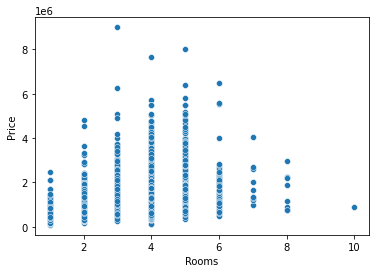

In [12]:
sns.scatterplot(df['Rooms'],df['Price'])
plt.show()

In [13]:
df[['Rooms','Price']].corr(method='spearman')

,Rooms,Price
Rooms,1.000000,0.539886
Price,0.539886,1.000000


korelasi antara Rooms dan Price senilai 0.53 dengan arah korelasi berbanding lurus/positif

# Nomor 6

In [41]:
df.groupby('Regionname')[['Rooms','Price']].corr(method='pearson')

Rooms     Price
Regionname                                          
Eastern Metropolitan       Rooms  1.000000  0.502993
                           Price  0.502993  1.000000
Eastern Victoria           Rooms  1.000000  0.314423
                           Price  0.314423  1.000000
Northern Metropolitan      Rooms  1.000000  0.392813
                           Price  0.392813  1.000000
Northern Victoria          Rooms  1.000000  0.361144
                           Price  0.361144  1.000000
South-Eastern Metropolitan Rooms  1.000000  0.267799
                           Price  0.267799  1.000000
Southern Metropolitan      Rooms  1.000000  0.683744
                           Price  0.683744  1.000000
Western Metropolitan       Rooms  1.000000  0.476030
                           Price  0.476030  1.000000
Western Victoria           Rooms  1.000000  0.551887
                           Price  0.551887  1.000000

In [67]:
dgrup=df.groupby('Regionname')[['Rooms','Price']].corr(method='pearson')
dgrup.sort_values(['Rooms','Price'],ascending=False).head(1)

,,Rooms,Price
Regionname,,,
Southern Metropolitan,Rooms,1.0,0.683744


# Nomor 7

In [31]:
df[['Distance','Price']].corr(method='spearman')

,Distance,Price
Distance,1.00000,-0.12999
Price,-0.12999,1.00000


Korelasi antara variabel Distance dan Price sebesar -0.12 , dengan arah tidak berbanding lurus/bertentangan (negatif)

# Nomor 8

In [68]:
df.groupby('Regionname')[['Distance','Price']].corr(method='pearson')

Distance     Price
Regionname                                             
Eastern Metropolitan       Distance  1.000000 -0.124356
                           Price    -0.124356  1.000000
Eastern Victoria           Distance  1.000000 -0.345699
                           Price    -0.345699  1.000000
Northern Metropolitan      Distance  1.000000 -0.368552
                           Price    -0.368552  1.000000
Northern Victoria          Distance  1.000000  0.089566
                           Price     0.089566  1.000000
South-Eastern Metropolitan Distance  1.000000 -0.285564
                           Price    -0.285564  1.000000
Southern Metropolitan      Distance  1.000000  0.002489
                           Price     0.002489  1.000000
Western Metropolitan       Distance  1.000000 -0.334086
                           Price    -0.334086  1.000000
Western Victoria           Distance  1.000000 -0.046064
                           Price    -0.046064  1.000000

Regionname yang variabel distance paling tidak berkorelasi dengan variabel harga adalah Southern Metropolitan dengan arah korelasi positif sebesar 0.0024

Regionname yang variabel distance paling berkorelasi dengan variabel harga adalah Northern Metropolitan dengan arah korelasi negatif sebesar -0.368

# Nomor 9

Ho : Variabel Method tidak ada keterkaitan dengan variabel Type
Ha : Variabel Method ada keterkaitan dengan variabel Type

In [78]:
from scipy.stats import chi2_contingency

In [79]:
df_k=pd.crosstab(df['Method'],df['Type'])
df_k

Type,h,t,u
Method,,,
PI,1069,134,361
S,6507,723,1792
SA,66,7,19
SP,1079,143,481
VB,728,107,364


In [81]:
stats,pval,dof,expected=chi2_contingency(df_k)
print(pval)

if pval<=0.05:
    print('Tolak Ho, ada keterkaitan variabel method dengan variabel type')
else:
    print('Terima Ho, tidak ada keterkaitan variabel method dengan variabel type')

3.183702485154338e-22
Tolak Ho, ada keterkaitan variabel method dengan variabel type


# Nomor 10

In [90]:
ratapr=df.groupby('Regionname')['Price'].mean()
df2=pd.DataFrame(ratapr)
df2

,Price
Regionname,
Eastern Metropolitan,1.104080e+06
Eastern Victoria,6.999808e+05
Northern Metropolitan,8.981711e+05
Northern Victoria,5.948293e+05
South-Eastern Metropolitan,9.229438e+05
Southern Metropolitan,1.372963e+06
Western Metropolitan,8.664205e+05
Western Victoria,3.975234e+05


In [91]:
from scipy.stats import f_oneway

stats,pval=f_oneway(
    df[df['Regionname']=='Eastern Metropolitan']['Price'],
    df[df['Regionname']=='Eastern Victoria']['Price'],
    df[df['Regionname']=='Nothern Metropolitan']['Price'],
    df[df['Regionname']=='Nothern Victoria']['Price'],
    df[df['Regionname']=='South-Eastern Metropolitan']['Price'],
    df[df['Regionname']=='Southern Metropolitan']['Price'],
    df[df['Regionname']=='Western Metropolitan']['Price'],
    df[df['Regionname']=='Western Metropolitan']['Price']
    )

print(stats)
print(pval)

#conclusion
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Terima Ho')

nan
nan
Terima Ho


C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
